In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

In [2]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV
from sklearn.metrics import *
from sklearn import model_selection
from sklearn import ensemble
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from h2o.automl import H2OAutoML
import h2o

In [3]:
df = pd.read_csv('input/jugadores_20.csv')

In [4]:
df.fillna(0, inplace = True)
df = df.drop(['player_url','dob','real_face','player_tags','long_name','sofifa_id','skill_moves'], axis = 1)
for col in df.columns:
    print(col)

short_name
age
height_cm
weight_kg
nationality
club
overall
potential
value_eur
wage_eur
player_positions
preferred_foot
international_reputation
weak_foot
work_rate
body_type
release_clause_eur
team_position
team_jersey_number
loaned_from
joined
contract_valid_until
nation_position
nation_jersey_number
pace
shooting
passing
dribbling
defending
physic
gk_diving
gk_handling
gk_kicking
gk_reflexes
gk_speed
gk_positioning
player_traits
attacking_crossing
attacking_finishing
attacking_heading_accuracy
attacking_short_passing
attacking_volleys
skill_dribbling
skill_curve
skill_fk_accuracy
skill_long_passing
skill_ball_control
movement_acceleration
movement_sprint_speed
movement_agility
movement_reactions
movement_balance
power_shot_power
power_jumping
power_stamina
power_strength
power_long_shots
mentality_aggression
mentality_interceptions
mentality_positioning
mentality_vision
mentality_penalties
mentality_composure
defending_marking
defending_standing_tackle
defending_sliding_tackle
goal

In [34]:
# Total features 47
clf_features = ['pace',
'shooting',
'passing',
'dribbling',
'defending',
'physic',
'gk_diving',
'gk_handling',
'gk_kicking',
'gk_reflexes',
'gk_speed',
'gk_positioning',
'attacking_crossing',
'attacking_finishing',
'attacking_heading_accuracy',
'attacking_short_passing',
'attacking_volleys',
'skill_dribbling',
'skill_curve',
'skill_fk_accuracy',
'skill_long_passing',
'skill_ball_control',
'movement_acceleration',
'movement_sprint_speed',
'movement_agility',
'movement_reactions',
'movement_balance',
'power_shot_power',
'power_jumping',
'power_stamina',
'power_strength',
'power_long_shots',
'mentality_aggression',
'mentality_interceptions',
'mentality_positioning',
'mentality_vision',
'mentality_penalties',
'mentality_composure',
'defending_marking',
'defending_standing_tackle',
'defending_sliding_tackle',
'goalkeeping_diving',
'goalkeeping_handling',
'goalkeeping_kicking',
'goalkeeping_positioning'
,'goalkeeping_reflexes'
,'weak_foot']

targets = ['player_positions']

df_clf = df[clf_features]
df_clf.head()

df_targets = df[targets]
df_targets.head()

y_categ = []


position = dict()
position['Defensas'] = ['LWB', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']
position['Medios'] = ['LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LDM', 'CDM', 'RDM']
position['Delanteros'] = ['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW']
position['Porteros'] = ['GK']

pos = dict()
pos['Defensas'] = 0
pos['Medios'] = 1
pos['Delanteros'] = 2
pos['Porteros'] = 3


for i in range(len(df_targets)):
     for k, v in position.items():
        if df_targets['player_positions'][i].split(',')[0] in v:
            y_categ.append(pos[k]) 

print(len(y_categ))

y_one_hot = np.zeros((len(y_categ),len(pos)))
for i in range(len(y_categ)):
    y_one_hot[i,y_categ[i]] = 1


18278


In [14]:
X_train = df_clf.values
print(X_train[0])

[87. 92. 92. 96. 39. 66.  0.  0.  0.  0.  0.  0. 88. 95. 70. 92. 88. 97.
 93. 94. 92. 96. 91. 84. 93. 95. 95. 86. 68. 75. 68. 94. 48. 40. 94. 94.
 75. 96. 33. 37. 26.  6. 11. 15. 14.  8.  4.]


In [15]:
def normalize(X):
    
    X_mean = np.sum(X, axis = 0) / X.shape[0]
    X_sub_mean = X - X_mean
    
    X_range = np.max(X, axis = 0) - np.min(X, axis = 0)
    
    return X_sub_mean / X_range


In [16]:
X_train_norm = normalize(X_train)
#features normalized

In [17]:
X_train_norm.shape
y_categ = np.array(y_categ)
print(y_categ.shape)
np.max(y_categ)

(18278,)


3

### Modelo Linear Regression

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
log_reg = LogisticRegression(max_iter = 10000, C=40)

log_reg.fit(X_train_norm, y_categ)

LogisticRegression(C=40, max_iter=10000)

In [20]:
print(X_train_norm[0].shape)
log_reg.predict(X_train_norm[:5])

log_reg.score(X_train_norm, y_categ)

(47,)


0.8952292373345004

In [21]:
print(log_reg.decision_function(X_train_norm[:2]))

[[ -9.80996394  10.86445369  11.1602386  -12.21472834]
 [ -8.55688829   8.24209905  12.20440777 -11.88961854]]


### Atributos importantes para los porteros

(4, 47)


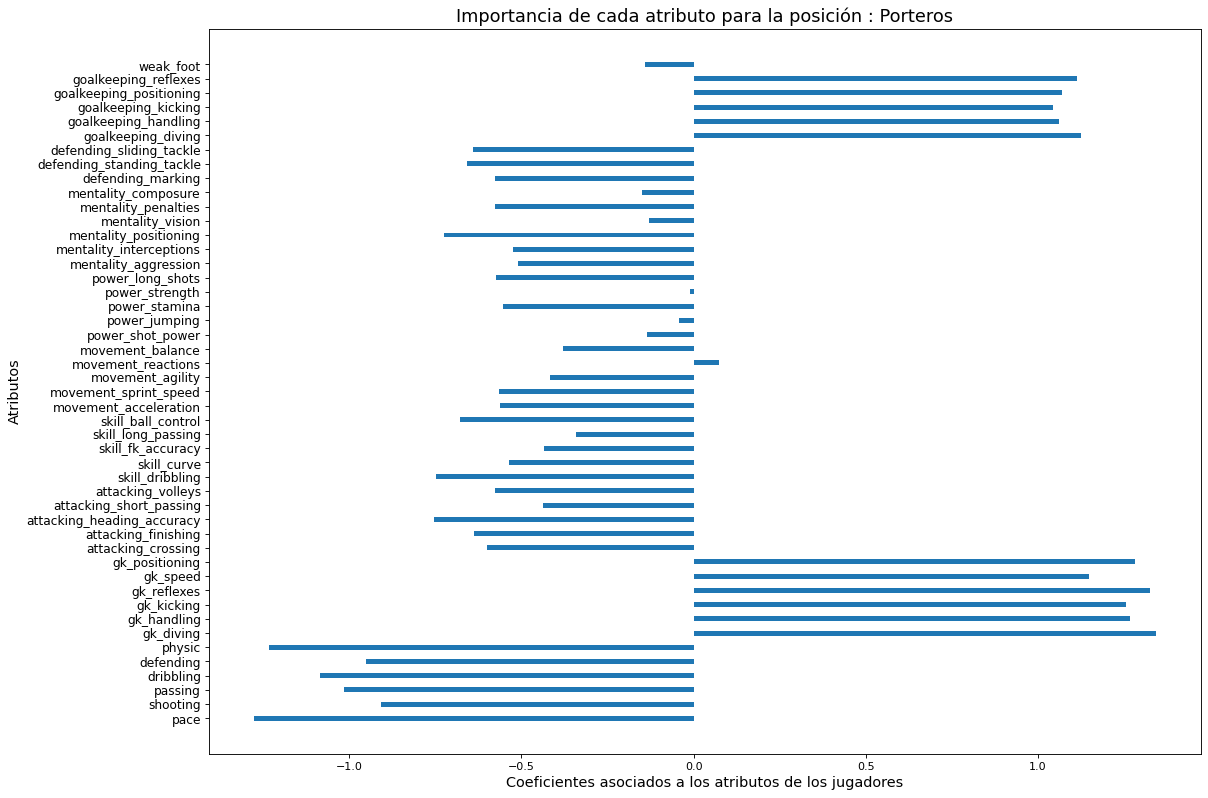

In [43]:
print(np.shape(log_reg.coef_))


plt.figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')
plt.xlabel('Coeficientes asociados a los atributos de los jugadores', fontsize = 13)
plt.ylabel('Atributos',fontsize = 13)
plt.title('Importancia de cada atributo para la posición : Porteros',fontsize = 16)


plt.barh(range(47),width = list(log_reg.coef_[idx['Porteros'],:]),height= 0.35,align='center')
plt.yticks(range(47), clf_features, rotation = 0, fontsize = 11)

plt.savefig('output/plot_atributos_posicion/porteros.png', bbox_inches='tight')

### Atributos importantes para los Defensas

(4, 47)


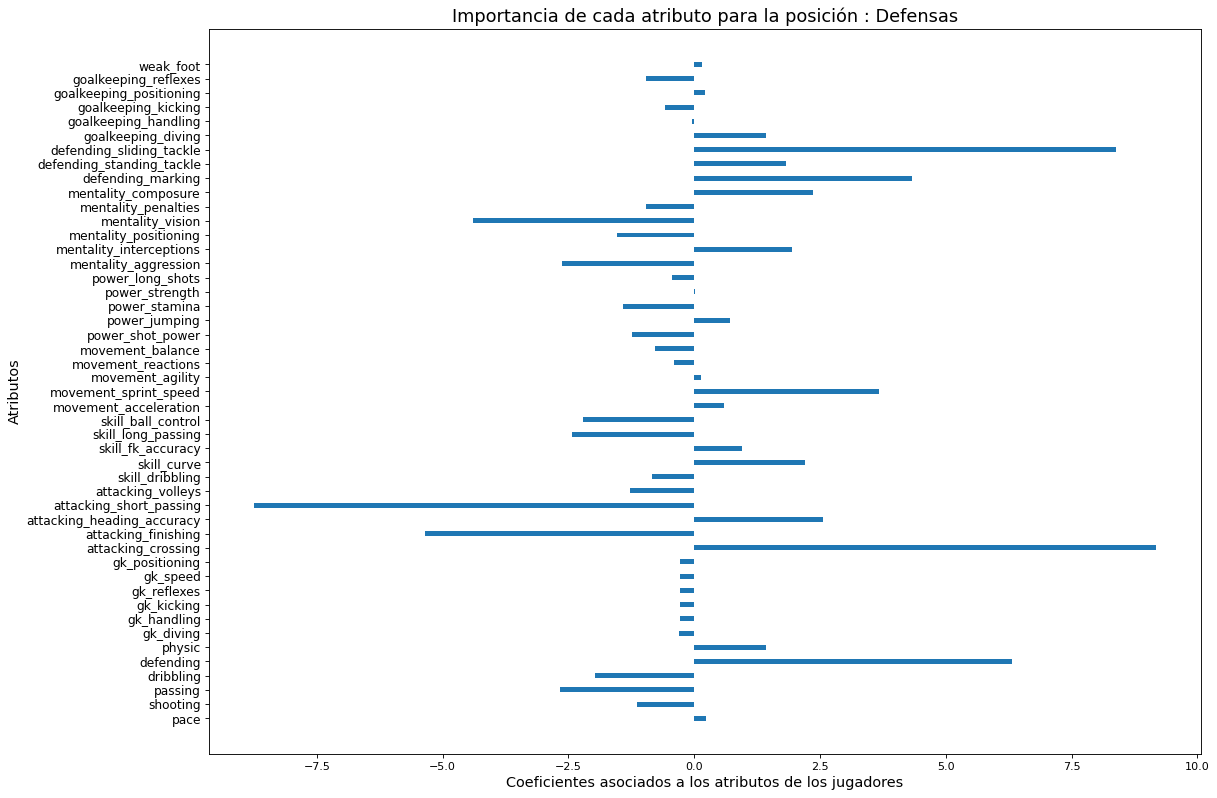

In [44]:
print(np.shape(log_reg.coef_))


plt.figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')
plt.xlabel('Coeficientes asociados a los atributos de los jugadores', fontsize = 13)
plt.ylabel('Atributos',fontsize = 13)
plt.title('Importancia de cada atributo para la posición : Defensas',fontsize = 16)

plt.barh(range(47),width = list(log_reg.coef_[idx['Defensas'],:]),height= 0.35,align='center')
plt.yticks(range(47), clf_features, rotation = 0, fontsize = 11)


plt.savefig('output/plot_atributos_posicion/defensas.png', bbox_inches='tight')

### Atributos importantes para los Medios

(4, 47)


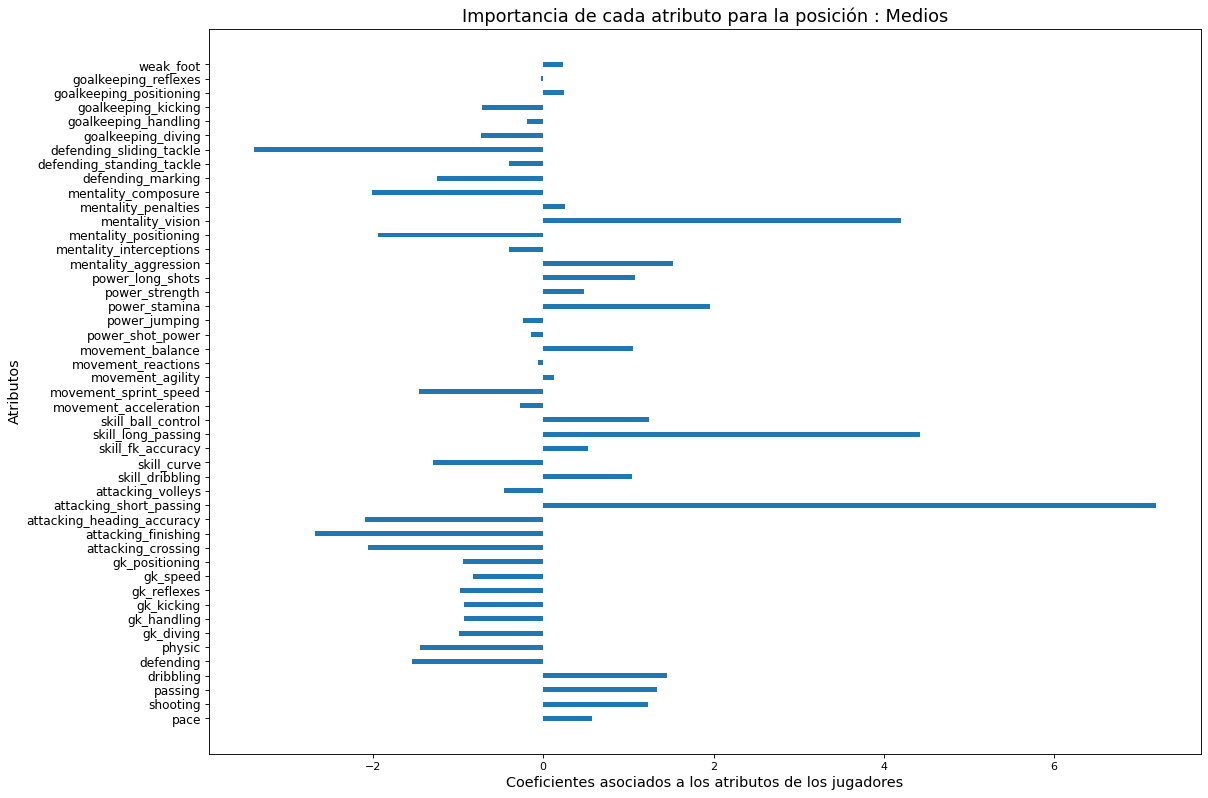

In [45]:
print(np.shape(log_reg.coef_))


plt.figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')
plt.xlabel('Coeficientes asociados a los atributos de los jugadores', fontsize = 13)
plt.ylabel('Atributos',fontsize = 13)
plt.title('Importancia de cada atributo para la posición : Medios',fontsize = 16)


plt.barh(range(47),width = list(log_reg.coef_[idx['Medios'],:]),height= 0.35,align='center')
plt.yticks(range(47), clf_features, rotation = 0, fontsize = 11)

plt.savefig('output/plot_atributos_posicion/medios.png', bbox_inches='tight')

### Atributos importantes para los Delanteros

(4, 47)


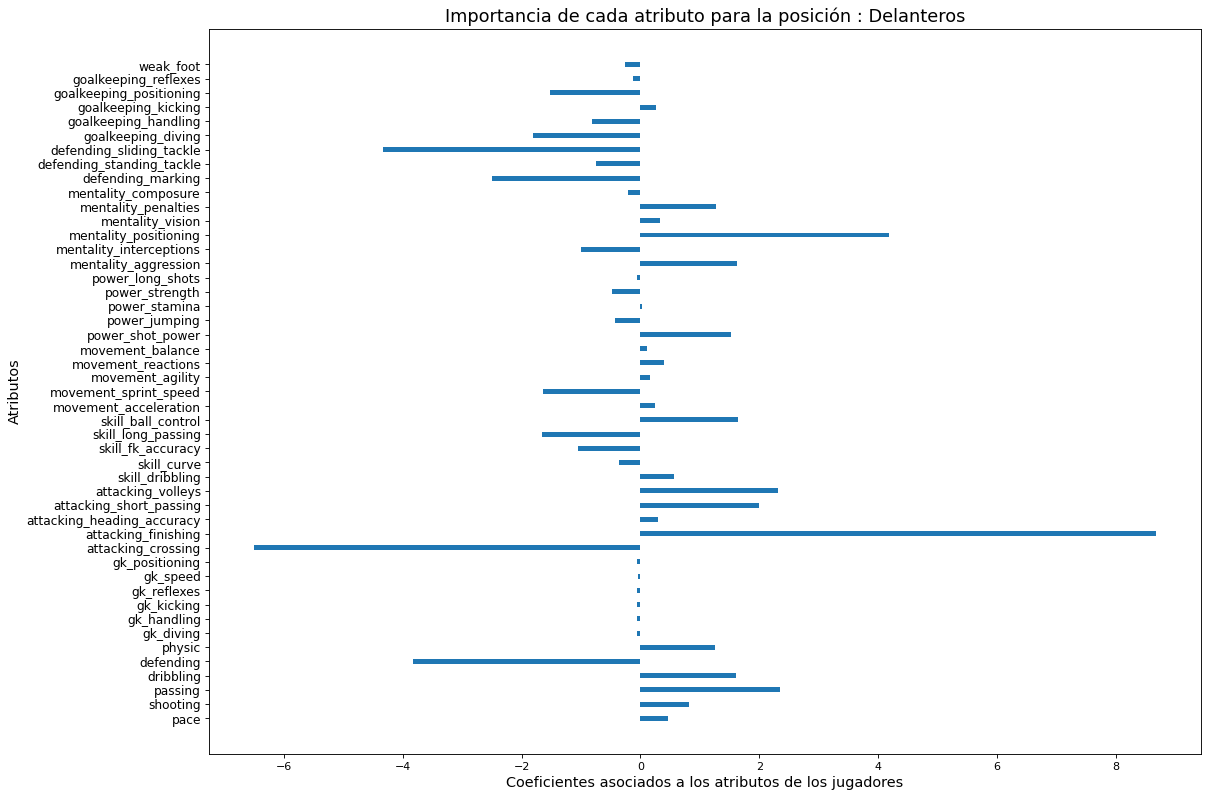

In [46]:
print(np.shape(log_reg.coef_))


plt.figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')
plt.xlabel('Coeficientes asociados a los atributos de los jugadores', fontsize = 13)
plt.ylabel('Atributos',fontsize = 13)
plt.title('Importancia de cada atributo para la posición : Delanteros',fontsize = 16)



plt.barh(range(47),width = list(log_reg.coef_[idx['Delanteros'],:]),height= 0.35,align='center')
plt.yticks(range(47), clf_features, rotation = 0, fontsize = 11)


plt.savefig('output/plot_atributos_posicion/delanteros.png', bbox_inches='tight')